In [58]:

from stock_prediction import ARIMAXGBoost
from stock_prediction.core import GradientDescentRegressor

In [59]:
from stock_prediction import StockPredictor
stock = StockPredictor("AAPL", "2018-01-01")
stock.load_data()


X =  stock.data.drop(columns="Close")
y = stock.data["Close"]
train_pct_index = int(0.7 * len(stock.data))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [60]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1122, 40), (1122,), (481, 40), (481,))

In [61]:
# Ensure the n_epoches is fixed
n_epochs = 2000

In [62]:
# Import various optimizers
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
# Nesterov
vanilla_sgd = SGDRegressor(loss='squared_error', penalty='elasticnet',random_state=42, verbose=10000,
                           learning_rate='constant', eta0=0.01, alpha=0.0001, l1_ratio=0.5,
                           n_iter_no_change=10,  validation_fraction=0.1,)
# Track loss manually
vanilla_sgd_loss_history = []
counter = 0
for _ in range(n_epochs):
    vanilla_sgd.partial_fit(X_train, y_train)  # Train for one epoch
    y_pred = vanilla_sgd.predict(X_train)
    loss = mean_squared_error(y_train, y_pred)
    vanilla_sgd_loss_history.append(loss)
    counter += 1
    print(f"Epoch {counter}")
  
# Fit the model with entire labelled data
# vanilla_sgd = SGDRegressor(loss='squared_error', random_state=42, verbose=10000)  
# vanilla_sgd.fit(X_train, y_train)



-- Epoch 1
Norm: 12.52, NNZs: 40, Bias: 112.916999, T: 1122, Avg. loss: 391.282543
Total training time: 0.00 seconds.
Epoch 1
-- Epoch 1
Norm: 11.90, NNZs: 40, Bias: 112.815381, T: 1122, Avg. loss: 1.495474
Total training time: 0.00 seconds.
Epoch 2
-- Epoch 1
Norm: 11.93, NNZs: 40, Bias: 112.775497, T: 1122, Avg. loss: 0.636394
Total training time: 0.00 seconds.
Epoch 3
-- Epoch 1
Norm: 11.99, NNZs: 40, Bias: 112.767095, T: 1122, Avg. loss: 0.567324
Total training time: 0.00 seconds.
Epoch 4
-- Epoch 1
Norm: 12.07, NNZs: 40, Bias: 112.764199, T: 1122, Avg. loss: 0.531944
Total training time: 0.00 seconds.
Epoch 5
-- Epoch 1
Norm: 12.17, NNZs: 40, Bias: 112.762934, T: 1122, Avg. loss: 0.506004
Total training time: 0.00 seconds.
Epoch 6
-- Epoch 1
Norm: 12.27, NNZs: 40, Bias: 112.762136, T: 1122, Avg. loss: 0.484971
Total training time: 0.00 seconds.
Epoch 7
-- Epoch 1
Norm: 12.37, NNZs: 40, Bias: 112.761492, T: 1122, Avg. loss: 0.467107
Total training time: 0.00 seconds.
Epoch 8
-- Epo

In [63]:

import numpy as np
# # model2 is selected by Bayesian optimization CV (Seems not good)
# model2 = GradientDescentRegressor(alpha = 0.04106938548944606,
#                 batch_size = 195,
#                 l1_ratio = 0.09329351308489861,
#                 lr = 0.1647418008086539,
#                 momentum = 0.8015665767210205,
#                 # n_iter = 614,
#                 n_iter = 5000,
#                 random_state = 42,
#                 rmsprop = True
#                 )
# model2.fit(X_train, y_train)


# # model3 is model used in the arimaxgboost
# model3 = GradientDescentRegressor(
#             # n_iter=1000,
#             n_iter = 5000,
#             lr=0.05,
#             alpha=0.01,
#             l1_ratio=0.01,
#             momentum=0.9,
#             rmsprop=False,
#             random_state=42,
#             # early_stopping=True,
#         )
# model3.fit(X_train, y_train)


# # model4 is rmsprop = True version of model3
# model4 = GradientDescentRegressor(
#             # n_iter=1000,
#             n_iter = 5000,
#             lr=0.05,
#             alpha=0.01,
#             l1_ratio=0.01,
#             momentum=0.9,
#             rmsprop=True,
#             random_state=42,
#             # early_stopping=True,
#         )
# model4.fit(X_train, y_train)


# default model without any tuning (with more iterations for illustration)
model5 = GradientDescentRegressor(
            n_iter=n_epochs,
            rmsprop=False,
            random_state=42,
        )
model5.fit(X_train, y_train)


Using QR decomposition for initialization


GradientDescentRegressor(n_iter=2000)

In [64]:
model5.get_params()

{'alpha': 0.0001,
 'batch_size': None,
 'early_stopping': False,
 'l1_ratio': 0.0001,
 'lr': 0.01,
 'momentum': 0.9,
 'n_iter': 2000,
 'newton': False,
 'random_state': 42,
 'rmsprop': False}

In [65]:

# # Start from default model and use optimization
# model6 = GradientDescentRegressor(
#             n_iter=n_epochs,
#             rmsprop=False,
#             random_state=42,
#         )
# _ = model6.optimize_hyperparameters(X_train, y_train, n_iter=500)
# print(_)
# # print(f"GD model parameters: { {k: model6.__dict__[k] for k in list(model6.__dict__.keys())[:8]}}"
# #             )
# model6.fit(X_train, y_train)

# loss_history2 = np.array(model2.loss_history)
# mse_history2 = np.array(model2.mse_history)
# # coef_history2 = np.array(model2.coef_history)
# # grad_history2 = np.array(model2.grad_history)

# loss_history3 = np.array(model3.loss_history)
# mse_history3 = np.array(model3.mse_history)
# # coef_history3 = np.array(model3.coef_history)
# # grad_history3 = np.array(model3.grad_history)

# loss_history4 = np.array(model4.loss_history)
# mse_history4 = np.array(model4.mse_history)
# # coef_history4 = np.array(model4.coef_history)
# # grad_history4 = np.array(model4.grad_history)

loss_history5 = np.array(model5.loss_history)
mse_history5 = np.array(model5.mse_history)
coef_history5 = np.array(model5.coef_history)
grad_history5 = np.array(model5.grad_history)

# loss_history6 = np.array(model6.loss_history)
# mse_history6 = np.array(model6.mse_history)
# # coef_history6 = np.array(model6.coef_history)
# # grad_history6 = np.array(model6.grad_history)

from matplotlib import pyplot as plt


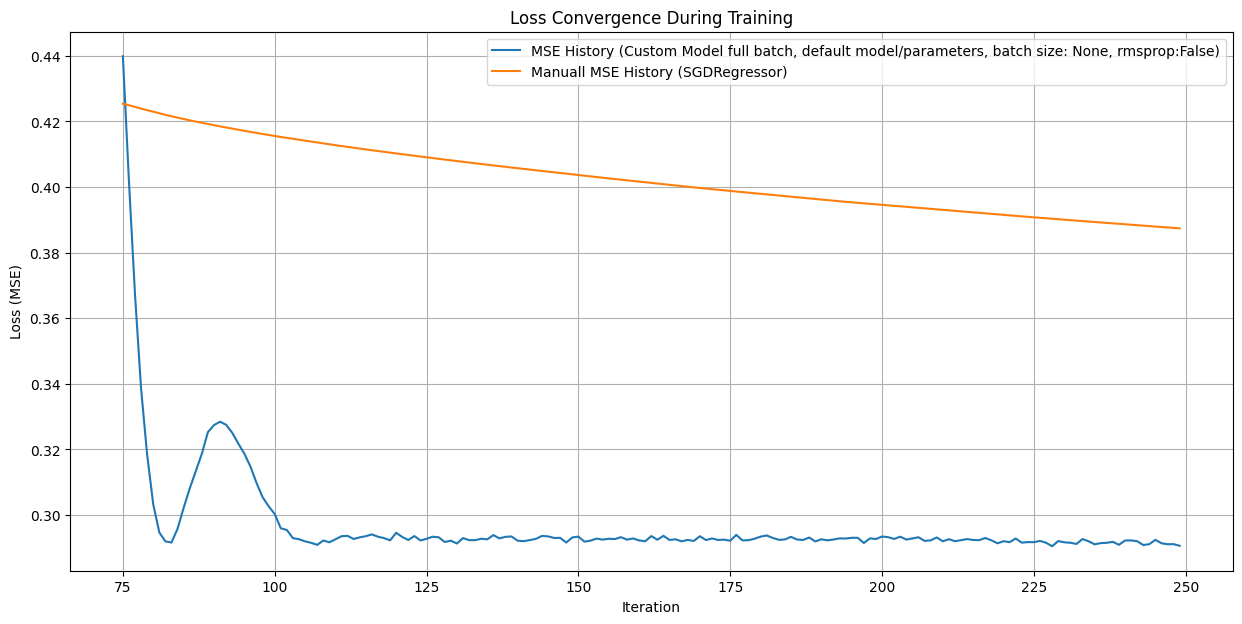

In [66]:
# matches the way of calculating loss 
plt.figure(figsize=(15, 7))
start =75
end = 250
# plt.plot(range(start,end),mse_history2[start:end], label=f'MSE History (Custom Model mini-batch, batch size:{model2.batch_size}, rmsprop:{model2.rmsprop})')
# plt.plot(range(start,end),mse_history3[start:end], label=f'MSE History (Custom Model full batch, batch size: {model3.batch_size}, rmsprop:{model3.rmsprop})')
# plt.plot(range(start,end),mse_history4[start:end], label=f'MSE History (Custom Model full batch, batch size: {model4.batch_size}, rmsprop:{model4.rmsprop})')
plt.plot(range(start,end),mse_history5[start:end], label=f'MSE History (Custom Model full batch, default model/parameters, batch size: {model5.batch_size}, rmsprop:{model5.rmsprop})')
# plt.plot(range(start,end),mse_history6[start:end], label=f'MSE History (Custom Model full batch, optimized parameters, batch size: {model6.batch_size}, rmsprop:{model6.rmsprop})')
plt.plot(range(start,end), np.array(vanilla_sgd_loss_history)[start:end], label='Manuall MSE History (SGDRegressor)')
if start <= np.argmin(mse_history5) <= end:
   plt.plot(np.argmin(mse_history5), mse_history5[np.argmin(mse_history5)], marker = 'o', label='Best MSE default model: {}'.format(mse_history5[np.argmin(mse_history5)]))
# plt.plot(np.argmin(mse_history6), mse_history6[np.argmin(mse_history6)], marker = 'o', label='Best MSE optimized model: {}'.format(mse_history6[np.argmin(mse_history6)]))
    
# if start <= np.argmin(vanilla_sgd_loss_history) <= end:
#    plt.plot(np.argmin(vanilla_sgd_loss_history), np.array(vanilla_sgd_loss_history).min(), 'ro', label='Best MSE SGDRegressor: {}'.format(np.array(vanilla_sgd_loss_history).min()))
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Loss Convergence During Training")
plt.legend()
plt.grid(True)
plt.show()


In [67]:
tol = 0
for i in range(len(mse_history5 < vanilla_sgd_loss_history)):
    if (mse_history5 < vanilla_sgd_loss_history)[i]:
        print(f"Epoch {i}: Custom Model MSE {mse_history5[i]} < SGDRegressor MSE {vanilla_sgd_loss_history[i]}")
        tol += 1
        if tol == 10:
            break

Epoch 13: Custom Model MSE 0.3614185340797768 < SGDRegressor MSE 0.6802864902490416
Epoch 36: Custom Model MSE 0.29189847585493633 < SGDRegressor MSE 0.48605975093193476
Epoch 57: Custom Model MSE 0.4232580185022942 < SGDRegressor MSE 0.4400193855249112
Epoch 58: Custom Model MSE 0.3289003904943965 < SGDRegressor MSE 0.43878685741443396
Epoch 59: Custom Model MSE 0.29289764974149896 < SGDRegressor MSE 0.4377431580839856
Epoch 60: Custom Model MSE 0.30271378045092273 < SGDRegressor MSE 0.4366970768574669
Epoch 61: Custom Model MSE 0.3411158127792077 < SGDRegressor MSE 0.43572623600575033
Epoch 62: Custom Model MSE 0.40224984142383663 < SGDRegressor MSE 0.4348329975712666
Epoch 76: Custom Model MSE 0.40176400679844354 < SGDRegressor MSE 0.4249219632073098
Epoch 77: Custom Model MSE 0.36718131074934923 < SGDRegressor MSE 0.42440047677793336


In [68]:
# Want to see TEST loss over epochs
test_vanilla_sgd_loss_history = []
test_vanilla_sgd = SGDRegressor(loss='squared_error', penalty='elasticnet',random_state=42, verbose=10000,
                            learning_rate='constant', eta0=0.01, alpha=0.0001, l1_ratio=0.0001)
counter = 0
for _ in range(n_epochs):
     # Test for one epoch
    test_vanilla_sgd.partial_fit(X_train, y_train)  # Train for one epoch
    y_pred =  test_vanilla_sgd.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    test_vanilla_sgd_loss_history.append(loss)
    counter += 1
    print(f"Epoch {counter}")


test_model5 = GradientDescentRegressor(
            n_iter=n_epochs,
            rmsprop=False,
            random_state=42,
        )
test_model5._fit_gd(X_train, y_train, X_test, y_test)
test_mse_history5 = np.array(test_model5.val_mse_history)
mse_history5 = np.array(test_model5.mse_history)


# test_model6 = GradientDescentRegressor(
#             n_iter=n_epochs,
#             rmsprop=False,
#             random_state=42,
#         )
# _ = test_model6.optimize_hyperparameters(X_train, y_train,n_iter=500)
# print(_)
# test_model6._fit_gd(X_train, y_train, X_test, y_test)
# test_mse_history6 = np.array(test_model6.val_mse_history)
# mse_history6 = np.array(test_model6.mse_history)


  


-- Epoch 1
Norm: 12.51, NNZs: 40, Bias: 112.916899, T: 1122, Avg. loss: 391.273078
Total training time: 0.01 seconds.
Epoch 1
-- Epoch 1
Norm: 11.90, NNZs: 40, Bias: 112.815288, T: 1122, Avg. loss: 1.496068
Total training time: 0.00 seconds.
Epoch 2
-- Epoch 1
Norm: 11.92, NNZs: 40, Bias: 112.775373, T: 1122, Avg. loss: 0.636635
Total training time: 0.00 seconds.
Epoch 3
-- Epoch 1
Norm: 11.98, NNZs: 40, Bias: 112.767017, T: 1122, Avg. loss: 0.567582
Total training time: 0.00 seconds.
Epoch 4
-- Epoch 1
Norm: 12.07, NNZs: 40, Bias: 112.764096, T: 1122, Avg. loss: 0.532260
Total training time: 0.00 seconds.
Epoch 5
-- Epoch 1
Norm: 12.16, NNZs: 40, Bias: 112.762827, T: 1122, Avg. loss: 0.506376
Total training time: 0.00 seconds.
Epoch 6
-- Epoch 1
Norm: 12.26, NNZs: 40, Bias: 112.762011, T: 1122, Avg. loss: 0.485394
Total training time: 0.00 seconds.
Epoch 7
-- Epoch 1
Norm: 12.36, NNZs: 40, Bias: 112.761376, T: 1122, Avg. loss: 0.467590
Total training time: 0.00 seconds.
Epoch 8
-- Epo

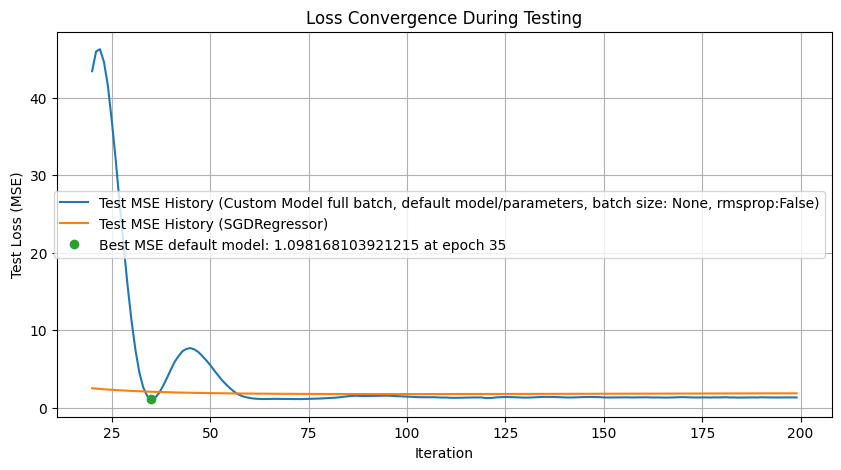

In [69]:
plt.figure(figsize=(10, 5))
start = 20
end = 200
plt.plot(range(start,end),test_mse_history5[start:end], label=f'Test MSE History (Custom Model full batch, default model/parameters, batch size: {model5.batch_size}, rmsprop:{model5.rmsprop})')
# plt.plot(range(start,end),test_mse_history6[start:end], label=f'Test MSE History (Custom Model full batch, optimized parameters, batch size: {model6.batch_size}, rmsprop:{model6.rmsprop})')
plt.plot(range(start,end), np.array(test_vanilla_sgd_loss_history)[start:end], label='Test MSE History (SGDRegressor)')

# if start <= np.argmin(test_vanilla_sgd_loss_history) <= end:
#    plt.plot(np.argmin(test_vanilla_sgd_loss_history), np.array(test_vanilla_sgd_loss_history).min(), 'o', label='Best MSE SGDRegressor: {}'.format(np.array(test_vanilla_sgd_loss_history).min()))
plt.plot(np.argmin(test_mse_history5), test_mse_history5.min(), 'o', label=f'Best MSE default model: {test_mse_history5[np.argmin(test_mse_history5)]} at epoch {np.argmin(test_mse_history5)}')
# plt.plot(np.argmin(test_mse_history6), test_mse_history6.min(), 'ro')
plt.xlabel("Iteration")
plt.ylabel("Test Loss (MSE)")
plt.title("Loss Convergence During Testing")
plt.legend()
plt.grid(True)
plt.show()


In [70]:

# Find global minima and maxima indexes
import pandas as pd

np.argmin(test_mse_history5) 



35

In [71]:
np.argmin(mse_history5) # train

1811

In [72]:
np.argmin(vanilla_sgd_loss_history)

1999

In [73]:
np.argmin(np.array(test_vanilla_sgd_loss_history))


97

In [74]:
min(test_mse_history5), min(test_vanilla_sgd_loss_history)

(1.098168103921215, 1.7630310721266615)

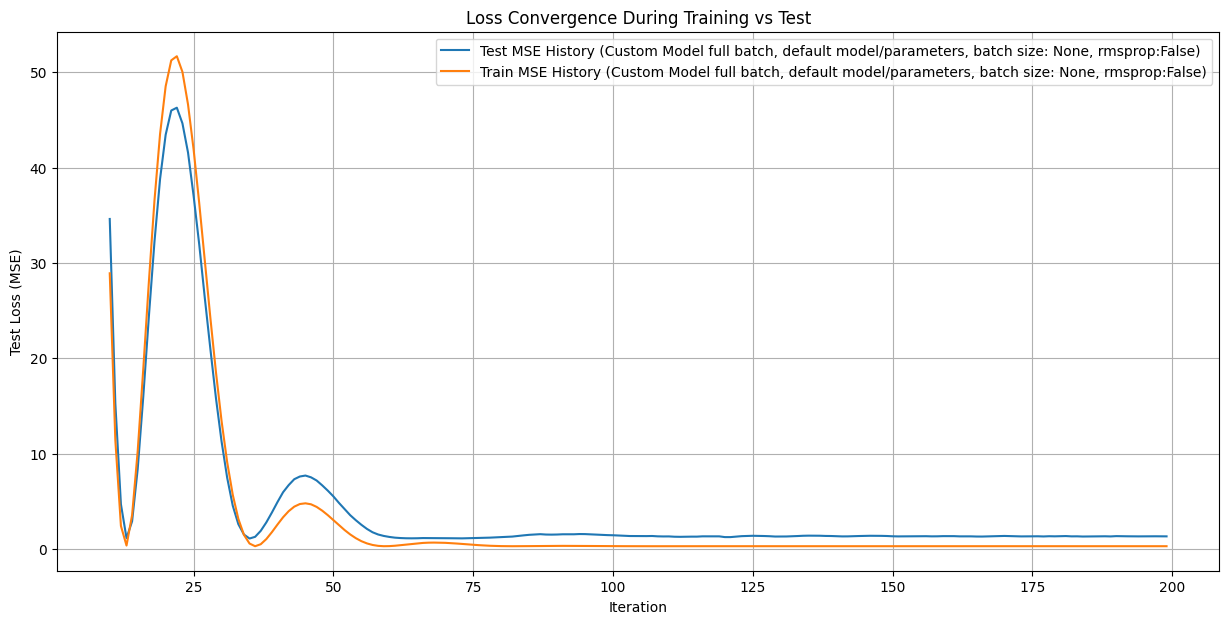

In [75]:
plt.figure(figsize=(15, 7))
start = 10
end = 200
plt.plot(range(start,end),test_mse_history5[start:end], label=f'Test MSE History (Custom Model full batch, default model/parameters, batch size: {model5.batch_size}, rmsprop:{model5.rmsprop})')
plt.plot(range(start,end),mse_history5[start:end], label=f'Train MSE History (Custom Model full batch, default model/parameters, batch size: {model5.batch_size}, rmsprop:{model5.rmsprop})')

# plt.plot(range(start,end),mse_history6[start:end], label=f'Train MSE History (Custom Model full batch, optimized parameters, batch size: {model6.batch_size}, rmsprop:{model6.rmsprop})')
# plt.plot(range(start,end),test_mse_history6[start:end], label=f'Test MSE History (Custom Model full batch, optimized parameters, batch size: {model6.batch_size}, rmsprop:{model6.rmsprop})')

# plt.plot(range(start,end), np.array(vanilla_sgd_loss_history)[start:end], label='Train MSE History (SGDRegressor)')
# plt.plot(range(start,end), np.array(test_vanilla_sgd_loss_history)[start:end], label='Test MSE History (SGDRegressor)')

# if start <= np.argmin(mse_history5) <= end and  start <= np.argmin(test_mse_history5) <= end:
#     plt.plot(np.argmin(mse_history5), mse_history5[np.argmin(mse_history5)], marker='o')
#     plt.plot(np.argmin(test_mse_history5), test_mse_history5[np.argmin(test_mse_history5)], marker='o')

# if start <= np.argmin(mse_history6) <= end and  start <= np.argmin(test_mse_history6) <= end:
#     plt.plot(np.argmin(mse_history6), mse_history6[np.argmin(mse_history6)], marker='o')
#     plt.plot(np.argmin(test_mse_history6), test_mse_history6[np.argmin(test_mse_history6)], marker='o') 

# if start <= np.argmin(vanilla_sgd_loss_history) <= end and  start <= np.argmin(np.array(test_vanilla_sgd_loss_history)) <= end:
#     plt.plot(np.argmin(vanilla_sgd_loss_history),vanilla_sgd_loss_history[np.argmin(vanilla_sgd_loss_history)], 'ro')
#     plt.plot(np.argmin(np.array(test_vanilla_sgd_loss_history)), np.array(test_vanilla_sgd_loss_history).min(), 'ro')
plt.xlabel("Iteration")
plt.ylabel("Test Loss (MSE)")
plt.title("Loss Convergence During Training vs Test")
plt.legend()
plt.grid(True)
plt.show()


## Note: 
- No need to get RMSprop for full batch as it fluctuates while the loss function is always lower for ones without RMSprop.
- It is necessary to have rmsprop for mini-batch and stochastic gd.
- Mini-batch/s trade efficiency by accuracy.